In [2]:
import pandas as pd
import numpy as np
#df = pd.read_csv(r"C:\Users\anvit\Desktop\Documents\Zoom\ma5755-capstone-project\data\raw\area_production_yield_data.csv")
crop_production = pd.read_csv("../data/raw/area_production_yield_data.csv")

print(crop_production.head())
print(crop_production.columns)

   Dist Code  Year  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1  1966          14  Chhattisgarh      Durg                548.0   
1          1  1967          14  Chhattisgarh      Durg                547.0   
2          1  1968          14  Chhattisgarh      Durg                556.3   
3          1  1969          14  Chhattisgarh      Durg                563.4   
4          1  1970          14  Chhattisgarh      Durg                571.6   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                        185.0                  337.59                  44.0   
1                        409.0                  747.71                  50.0   
2                        468.0                  841.27                  53.7   
3                        400.8                  711.40                  49.4   
4                        473.6                  828.55                  44.2   

   WHEAT PRODUCTION (1000 tons)  ...  SUGARC

In [3]:
crop_production.describe()

,Dist Code,Year,State Code,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),KHARIF SORGHUM AREA (1000 ha),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
count,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,...,16146.00000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000
mean,269.769231,1991.496841,9.568562,128.593192,224.889565,1486.924784,77.057946,182.012746,1492.419859,22.632268,...,4500.15306,28.018367,7.229225,124.644823,7.750478,11.086250,18.677877,3.177038,1.194604,21.550328
std,278.309125,15.011185,4.988538,160.078825,326.629828,956.185281,100.394479,348.834254,1081.255367,45.062714,...,3153.97042,74.239648,25.042132,207.681147,13.591135,18.003257,25.881842,8.029509,4.285067,60.062601
min,1.000000,1966.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,78.000000,1978.000000,6.000000,10.400000,9.460000,800.000000,1.770000,2.000000,750.000000,0.000000,...,2000.00000,0.000000,0.000000,0.000000,0.310000,1.600000,2.520000,0.000000,0.060000,0.000000
50%,156.000000,1991.000000,10.000000,66.800000,95.840000,1333.210000,36.800000,42.700000,1347.450000,2.050000,...,4502.21000,0.050000,0.000000,0.000000,2.220000,4.740000,8.945000,0.390000,0.280000,1.200000
75%,241.000000,2005.000000,12.000000,191.390000,315.715000,2113.517500,123.000000,215.192500,2131.580000,20.900000,...,6704.60500,10.097500,2.000000,202.270000,8.790000,12.510000,23.570000,3.150000,0.880000,16.762500
max,917.000000,2017.000000,20.000000,1154.230000,3215.010000,5653.830000,879.490000,4305.500000,5541.520000,334.800000,...,22062.30000,800.890000,376.610000,5000.000000,159.540000,200.060000,240.990000,111.610000,131.350000,1162.660000


In [7]:
# Step 1: Drop duplicates
df = crop_production.drop_duplicates()

# Step 2: Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 3: Handle missing values
# Drop rows missing essential identifiers
df = df.dropna(subset=["state_name", "dist_name", "year"])

# Fill NaNs in crop data with 0 (means no cultivation that year)
crop_cols = [col for col in df.columns if any(keyword in col for keyword in ['area', 'production', 'yield'])]
df[crop_cols] = df[crop_cols].fillna(0)

# Step 4: Convert datatypes
df["year"] = df["year"].astype(int)
df["state_name"] = df["state_name"].str.strip().str.lower()
df["dist_name"] = df["dist_name"].str.strip().str.lower()

# Step 5: (Optional) Filter out zero or unrealistic yields
for col in df.columns:
    if "yield" in col:
        df = df[df[col] >= 0]

# Step 6: Reset index
df = df.reset_index(drop=True)

# Done!
print("Preprocessed data shape:", df.shape)
print(df.head(3))


Preprocessed data shape: (13654, 80)
   dist_code  year  state_code    state_name dist_name  rice_area_(1000_ha)  \
0          1  1969          14  chhattisgarh      durg                563.4   
1          1  1970          14  chhattisgarh      durg                571.6   
2          1  1971          14  chhattisgarh      durg                581.8   

   rice_production_(1000_tons)  rice_yield_(kg_per_ha)  wheat_area_(1000_ha)  \
0                        400.8                  711.40                  49.4   
1                        473.6                  828.55                  44.2   
2                        412.9                  709.69                  44.4   

   wheat_production_(1000_tons)  ...  sugarcane_yield_(kg_per_ha)  \
0                          26.5  ...                       1900.0   
1                          29.0  ...                       2000.0   
2                          25.8  ...                       2000.0   

   cotton_area_(1000_ha)  cotton_production_(100

In [8]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# List of crops to keep
crops = ['rice', 'wheat', 'groundnut', 'sunflower', 'soyabean',
         'oilseeds', 'sugarcane', 'cotton', 'fruits_and_vegetables', 'potatoes', 'onion']

# Build list of relevant columns (area, production, yield for each crop)
target_cols = ['state_name', 'dist_name', 'year']
for crop in crops:
    for metric in ['area', 'production', 'yield']:
        col_name = f'{crop}_{metric}_(1000_ha)' if metric == 'area' else \
                   f'{crop}_{metric}_(1000_tons)' if metric == 'production' else \
                   f'{crop}_{metric}_(kg_per_ha)'
        # fix for "fruits and vegetables"
        col_name = col_name.replace('fruits_and_vegetables', 'fruits_and_vegetables')
        # check if column exists in df
        matched_cols = [col for col in df.columns if crop in col and metric in col]
        target_cols += matched_cols

# Drop duplicates and clean data
df = df.drop_duplicates()
df = df[target_cols]
df = df.fillna(0)

# Final check
print("Filtered dataset shape:", df.shape)
print(df.head(3))


Filtered dataset shape: (13654, 30)
     state_name dist_name  year  rice_area_(1000_ha)  \
0  chhattisgarh      durg  1969                563.4   
1  chhattisgarh      durg  1970                571.6   
2  chhattisgarh      durg  1971                581.8   

   rice_production_(1000_tons)  rice_yield_(kg_per_ha)  wheat_area_(1000_ha)  \
0                        400.8                  711.40                  49.4   
1                        473.6                  828.55                  44.2   
2                        412.9                  709.69                  44.4   

   wheat_production_(1000_tons)  wheat_yield_(kg_per_ha)  \
0                          26.5                   536.44   
1                          29.0                   656.11   
2                          25.8                   581.08   

   groundnut_area_(1000_ha)  ...  oilseeds_yield_(kg_per_ha)  \
0                       0.1  ...                      130.54   
1                       0.1  ...                 

In [4]:
#df_month_rain = pd.read_csv(r"C:\Users\anvit\Desktop\Documents\Zoom\ma5755-capstone-project\data\raw\monthly_rainfall_data.csv")
df_month_rain = pd.read_csv("../data/raw/monthly_rainfall_data.csv")

# print(df_month_rain.head())
df_month_rain.head()

,Dist Code,Year,State Code,State Name,Dist Name,JANUARY RAINFALL (Millimeters),FEBRUARY RAINFALL (Millimeters),MARCH RAINFALL (Millimeters),APRIL RAINFALL (Millimeters),MAY RAINFALL (Millimeters),JUNE RAINFALL (Millimeters),JULY RAINFALL (Millimeters),AUGUST RAINFALL (Millimeters),SEPTEMBER RAINFALL (Millimeters),OCTOBER RAINFALL (Millimeters),NOVEMBER RAINFALL (Millimeters),DECEMBER RAINFALL (Millimeters),ANNUAL RAINFALL (Millimeters)
0,1,1966,14,Chhattisgarh,Durg,1.4,0.0,0.0,8.9,38.6,169.5,249.5,182.6,112.6,4.8,0.9,1.0,769.8
1,1,1967,14,Chhattisgarh,Durg,0.1,0.0,73.4,0.6,0.0,237.5,342.9,428.8,142.8,3.3,0.0,34.2,1263.5
2,1,1968,14,Chhattisgarh,Durg,27.8,11.3,13.5,17.6,1.4,229.1,410.4,156.4,256.6,39.3,0.0,9.1,1172.3
3,1,1969,14,Chhattisgarh,Durg,0.6,0.0,0.0,15.3,16.5,98.3,375.8,239.1,180.9,2.5,0.0,0.0,929.0
4,1,1970,14,Chhattisgarh,Durg,8.3,7.9,32.9,0.2,2.3,317.2,535.9,410.9,139.0,29.7,0.0,0.0,1484.3


In [10]:
print(df_month_rain.columns)

Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'JANUARY RAINFALL (Millimeters)', 'FEBRUARY RAINFALL (Millimeters)',
       'MARCH RAINFALL (Millimeters)', 'APRIL RAINFALL (Millimeters)',
       'MAY RAINFALL (Millimeters)', 'JUNE RAINFALL (Millimeters)',
       'JULY RAINFALL (Millimeters)', 'AUGUST RAINFALL (Millimeters)',
       'SEPTEMBER RAINFALL (Millimeters)', 'OCTOBER RAINFALL (Millimeters)',
       'NOVEMBER RAINFALL (Millimeters)', 'DECEMBER RAINFALL (Millimeters)',
       'ANNUAL RAINFALL (Millimeters)'],
      dtype='object')


In [11]:
# Make a copy for cleaning
df_clean = df_month_rain.copy()

# Step 1: Clean column names
df_clean.columns = (
    df_clean.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
)

# Step 2: Convert rainfall columns to numeric
rainfall_columns = [col for col in df_clean.columns if 'rainfall' in col]
df_clean[rainfall_columns] = df_clean[rainfall_columns].apply(pd.to_numeric, errors='coerce')

# Step 3: Drop rows with missing rainfall data
df_clean.dropna(subset=rainfall_columns, inplace=True)

# Step 4: Feature Engineering - Monsoon average (June to September)
df_clean['monsoon_avg'] = df_clean[[
    'june_rainfall_millimeters', 
    'july_rainfall_millimeters', 
    'august_rainfall_millimeters', 
    'september_rainfall_millimeters'
]].mean(axis=1)

# View cleaned data
df_clean.head()



,dist_code,year,state_code,state_name,dist_name,january_rainfall_millimeters,february_rainfall_millimeters,march_rainfall_millimeters,april_rainfall_millimeters,may_rainfall_millimeters,june_rainfall_millimeters,july_rainfall_millimeters,august_rainfall_millimeters,september_rainfall_millimeters,october_rainfall_millimeters,november_rainfall_millimeters,december_rainfall_millimeters,annual_rainfall_millimeters,monsoon_avg
0,1,1966,14,Chhattisgarh,Durg,1.4,0.0,0.0,8.9,38.6,169.5,249.5,182.6,112.6,4.8,0.9,1.0,769.8,178.550
1,1,1967,14,Chhattisgarh,Durg,0.1,0.0,73.4,0.6,0.0,237.5,342.9,428.8,142.8,3.3,0.0,34.2,1263.5,288.000
2,1,1968,14,Chhattisgarh,Durg,27.8,11.3,13.5,17.6,1.4,229.1,410.4,156.4,256.6,39.3,0.0,9.1,1172.3,263.125
3,1,1969,14,Chhattisgarh,Durg,0.6,0.0,0.0,15.3,16.5,98.3,375.8,239.1,180.9,2.5,0.0,0.0,929.0,223.525
4,1,1970,14,Chhattisgarh,Durg,8.3,7.9,32.9,0.2,2.3,317.2,535.9,410.9,139.0,29.7,0.0,0.0,1484.3,350.750


In [5]:
# Load the data
#df_normal_rain = pd.read_csv(r"C:\Users\anvit\Desktop\Documents\Zoom\ma5755-capstone-project\data\raw\normal_rainfall_data.csv")  # Update path as needed
df_normal_rain = pd.read_csv("../data/raw/normal_rainfall_data.csv")


# Step 1: Standardize column names
df_normal_rain.columns = (
    df_normal_rain.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
)

# Step 2: Identify rainfall columns
rainfall_cols = [col for col in df_normal_rain.columns if 'rainfall' in col]

# Step 3: Convert rainfall values to numeric
df_normal_rain[rainfall_cols] = df_normal_rain[rainfall_cols].apply(pd.to_numeric, errors='coerce')

# Step 4: Drop rows with missing rainfall values
df_normal_rain.dropna(subset=rainfall_cols, inplace=True)

# Step 5: Compute average monsoon rainfall (June–September)
df_normal_rain['monsoon_avg'] = df_normal_rain[[
    'june_normal_rainfall_millimeters',
    'july_normal_rainfall_millimeters',
    'august_normal_rainfall_millimeters',
    'september_normal_rainfall_millimeters'
]].mean(axis=1)

# Final preview
print(df_normal_rain[['dist_name', 'monsoon_avg']].head())



  dist_name  monsoon_avg
0      Durg       274.00
1    Bastar       309.25
2    Raipur       307.25
3  Bilaspur       288.25
4   Raigarh       373.00


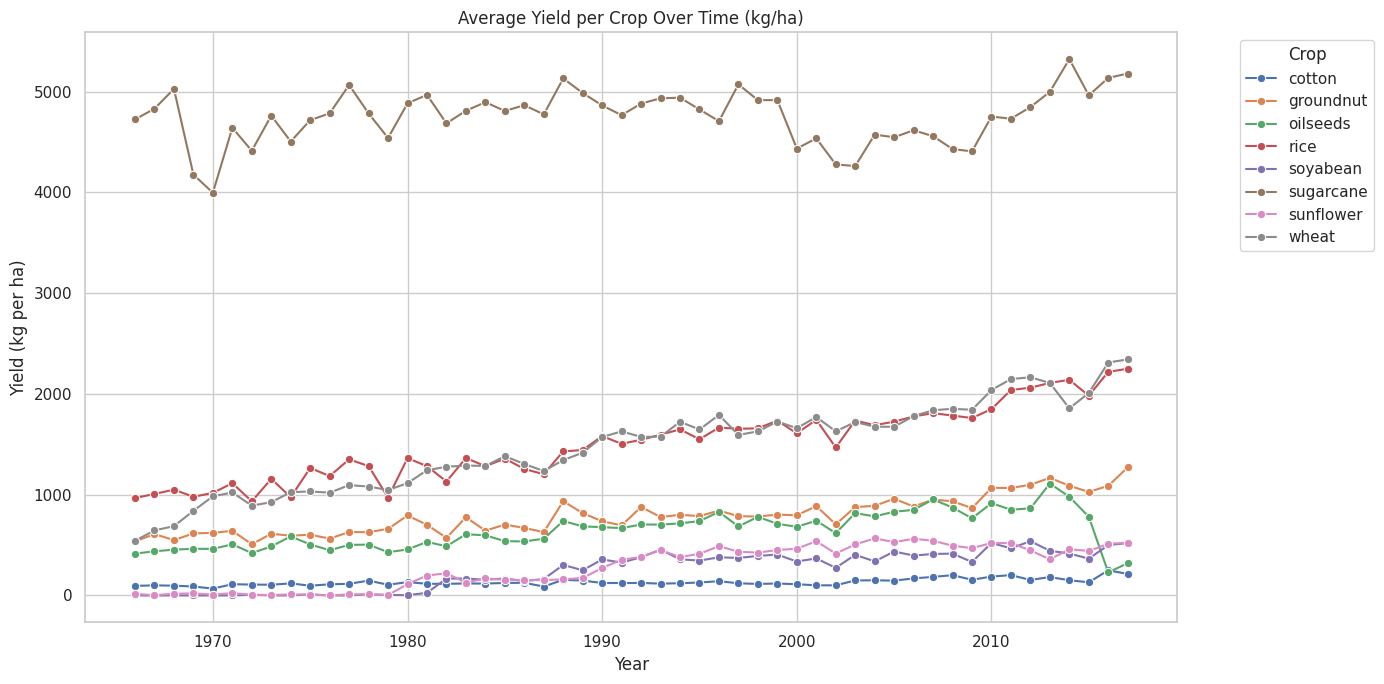

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Define crops
crops = [
    'rice', 'wheat', 'groundnut', 'sunflower', 'soyabean',
    'oilseeds', 'sugarcane', 'cotton', 'fruits_and_vegetables',
    'potatoes', 'onion'
]

# Select relevant columns
target_cols = ['state_name', 'dist_name', 'year']
for crop in crops:
    for suffix in ['area_(1000_ha)', 'production_(1000_tons)', 'yield_(kg_per_ha)']:
        col = f"{crop}_{suffix}"
        if col in df.columns:
            target_cols.append(col)

filtered_df = df[target_cols].drop_duplicates().fillna(0)

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Melt wide to long format for yield columns
yield_cols = [col for col in filtered_df.columns if '_yield_' in col]
melted_df = filtered_df.melt(
    id_vars=['state_name', 'dist_name', 'year'],
    value_vars=yield_cols,
    var_name='crop_yield_type',
    value_name='yield_kg_per_ha'
)

# Extract crop name from column
melted_df['crop'] = melted_df['crop_yield_type'].str.extract(
    r'(rice|wheat|groundnut|sunflower|soyabean|oilseeds|sugarcane|cotton|fruits_and_vegetables|potatoes|onion)'
)

# Group and average
avg_yield_by_crop_year = melted_df.groupby(['crop', 'year'])['yield_kg_per_ha'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_yield_by_crop_year, x='year', y='yield_kg_per_ha', hue='crop', marker='o')
plt.title('Average Yield per Crop Over Time (kg/ha)')
plt.xlabel('Year')
plt.ylabel('Yield (kg per ha)')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [14]:
# Crop categories
yield_cols = [col for col in filtered_df.columns if '_yield_' in col]
area_cols = [col for col in filtered_df.columns if '_area_' in col]
prod_cols = [col for col in filtered_df.columns if '_production_' in col]

# Basic descriptive statistics
print("=== Yield (kg/ha) ===")
display(filtered_df[yield_cols].describe())

print("\n=== Area (1000 ha) ===")
display(filtered_df[area_cols].describe())

print("\n=== Production (1000 tons) ===")
display(filtered_df[prod_cols].describe())


=== Yield (kg/ha) ===


,rice_yield_(kg_per_ha),wheat_yield_(kg_per_ha),groundnut_yield_(kg_per_ha),sunflower_yield_(kg_per_ha),soyabean_yield_(kg_per_ha),oilseeds_yield_(kg_per_ha),sugarcane_yield_(kg_per_ha),cotton_yield_(kg_per_ha)
count,13654.000000,13654.000000,13654.000000,13654.000000,13654.000000,13654.000000,13654.000000,13654.000000
mean,1569.443659,1559.785105,818.948439,323.667346,282.793508,670.988864,4757.842894,136.336524
std,984.571072,1118.161113,635.199765,531.383640,494.375408,694.075943,3217.490378,219.579835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,843.907500,769.230000,362.240000,0.000000,0.000000,333.330000,2315.557500,0.000000
50%,1458.775000,1427.740000,825.000000,0.000000,0.000000,602.875000,4930.710000,37.125000
75%,2233.192500,2260.032500,1145.952500,546.832500,530.805000,917.587500,7000.000000,226.950000
max,5653.830000,5541.520000,8500.000000,4282.050000,3884.060000,25500.000000,22062.300000,5000.000000



=== Area (1000 ha) ===


,rice_area_(1000_ha),wheat_area_(1000_ha),groundnut_area_(1000_ha),sunflower_area_(1000_ha),soyabean_area_(1000_ha),oilseeds_area_(1000_ha),sugarcane_area_(1000_ha),cotton_area_(1000_ha),fruits_and_vegetables_area_(1000_ha),potatoes_area_(1000_ha),onion_area_(1000_ha)
count,13654.000000,13654.000000,13654.000000,13654.000000,13654.000000,13654.000000,13654.000000,13654.000000,13654.000000,13654.000000,13654.000000
mean,125.623195,77.712896,24.656545,3.558034,16.119219,72.941533,11.911294,30.678472,18.580460,3.192629,1.313356
std,161.547324,102.709369,65.736398,20.323826,57.849272,98.783194,30.414248,77.362918,25.952721,8.510419,4.616770
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,8.500000,1.600000,0.060000,0.000000,0.000000,8.932500,0.150000,0.000000,2.430000,0.000000,0.070000
50%,59.700000,35.900000,2.300000,0.000000,0.000000,37.065000,1.600000,0.100000,8.850000,0.300000,0.300000
75%,183.000000,123.000000,18.080000,0.140000,0.070000,91.645000,8.600000,14.187500,23.277500,2.650000,0.930000
max,1154.230000,879.490000,899.040000,476.670000,529.600000,951.240000,342.410000,800.890000,240.990000,111.610000,131.350000



=== Production (1000 tons) ===


,rice_production_(1000_tons),wheat_production_(1000_tons),groundnut_production_(1000_tons),sunflower_production_(1000_tons),soyabean_production_(1000_tons),oilseeds_production_(1000_tons),sugarcane_production_(1000_tons),cotton_production_(1000_tons)
count,13654.000000,13654.000000,13654.000000,13654.000000,13654.000000,13654.000000,13654.000000,13654.000000
mean,237.348070,193.911394,24.530589,1.882997,16.453528,59.071392,79.827488,8.124680
std,344.977283,367.409331,73.102553,9.138755,63.387581,106.242081,210.196102,26.642323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,1.800000,0.030000,0.000000,0.000000,3.800000,0.500000,0.000000
50%,95.970000,43.605000,2.100000,0.000000,0.000000,17.500000,7.000000,0.010000
75%,334.075000,237.400000,17.000000,0.100000,0.040000,65.885000,50.500000,2.900000
max,3215.010000,4305.500000,1688.110000,222.670000,940.800000,1712.920000,3252.900000,376.610000
